# Importing libraries

In [81]:
import pandas as pd # dataframe
import numpy as np # numerical 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [82]:
df = pd.read_csv('clean_df.csv')
df = df.drop('customerID',axis=1)
df.head()

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
# mapping 'Yes' and 'No'  to 1 and 0

for i in df[['partner', 'dependents','phoneService', 'multipleLines','onlineSecurity', 'onlineBackup', 'deviceProtection', 'techSupport',
       'streamingTV', 'streamingMovies','paperlessBilling']]:
     df[i] =  df[i].map({'No':0,'Yes':1}) 

In [105]:
df.head(3)

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes


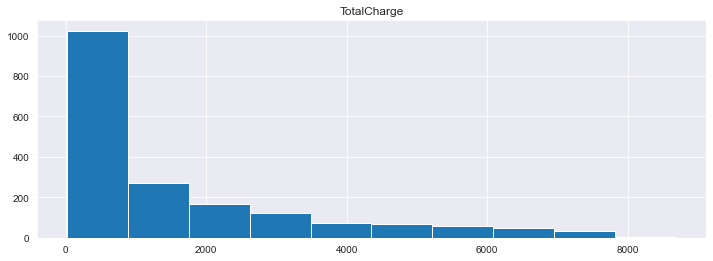

In [109]:
# total charge for churn yes
sns.set_style('darkgrid')
df[df['churn']=='Yes'].totalCharges.hist(figsize=(12,4))
plt.title("TotalCharge")
plt.show()

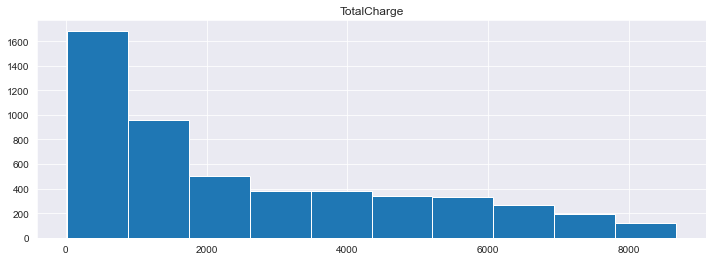

In [110]:
# total charge for churn yes
sns.set_style('darkgrid')
df[df['churn']=='No'].totalCharges.hist(figsize=(12,4))
plt.title("TotalCharge")
plt.show()

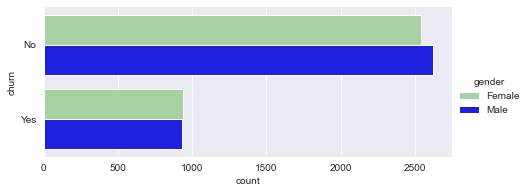

In [85]:
sns.catplot(y="churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h',palette=['#a1d99b','b'],hue='gender')

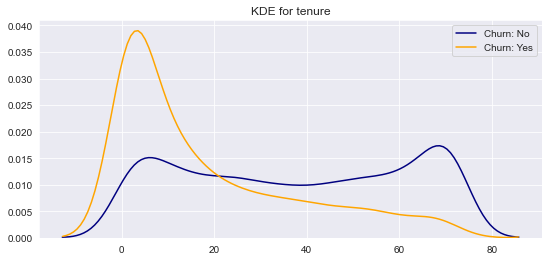

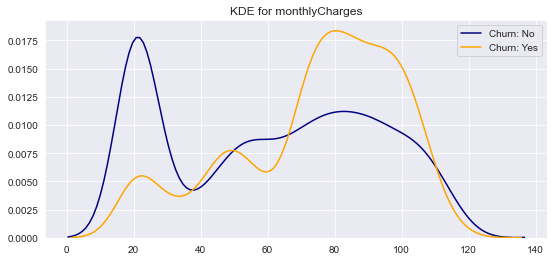

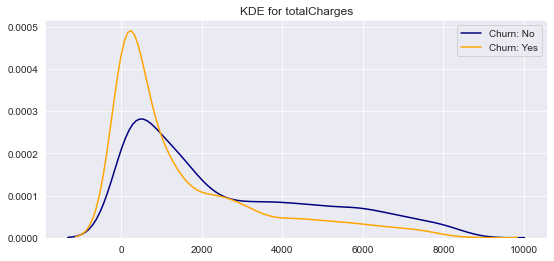

In [86]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('monthlyCharges')
kdeplot('totalCharges')

In [87]:
dfs =  df.groupby('contract')["churn"].value_counts()
dfs

contract        churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: churn, dtype: int64

# Let's Deep Down To Tenure

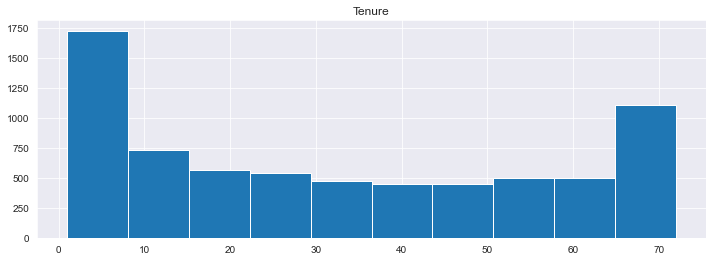

In [88]:
sns.set_style('darkgrid')
df.tenure.hist(figsize=(12,4))
plt.title("Tenure")
plt.show()

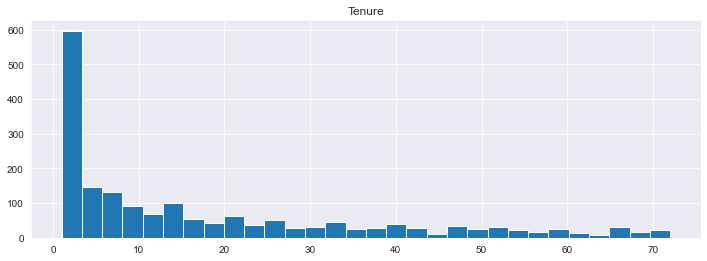

In [103]:
# for churn Yes
sns.set_style('darkgrid')
df[df['churn']=='Yes']['tenure'].hist(figsize=(12,4),bins=30)
plt.title("Tenure")
plt.show()

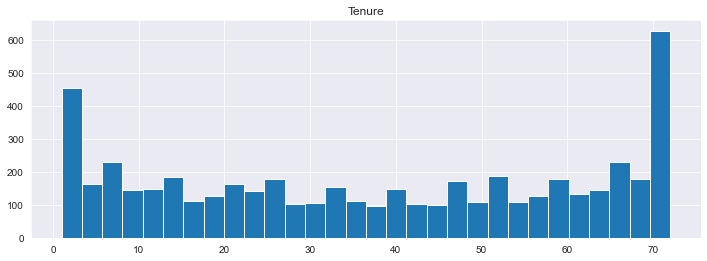

In [104]:
# for churn NO
sns.set_style('darkgrid')
df[df['churn']=='No']['tenure'].hist(figsize=(12,4),bins=30)
plt.title("Tenure")
plt.show()

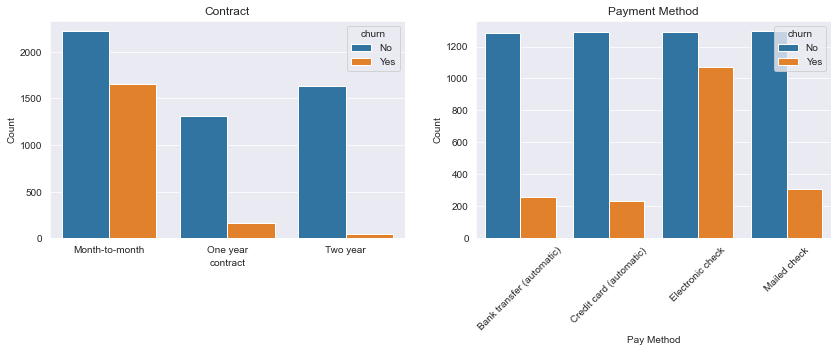

In [54]:
fig, axis = plt.subplots(1, 2, figsize=(14,4))
axis[0].set_title("Contract")
axis[1].set_title("Payment Method")

axis_y = "Count"
# Plot Partner column
contract_df = df.groupby('contract')["churn"].value_counts()
contract_df = contract_df.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='contract', y= axis_y, hue='churn', data=contract_df, ax=axis[0])
plt.xlabel("Contract")

# Plot Payment Method column
pay_df = df.groupby('paymentMethod')["churn"].value_counts()
pay_df = pay_df.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='paymentMethod', y= axis_y, hue='churn', data=pay_df, ax=axis[1])
plt.xticks(rotation=45)
plt.xlabel("Pay Method")
plt.show()

In [55]:
df.columns

Index(['gender', 'seniorCitizen', 'partner', 'dependents', 'tenure',
       'phoneService', 'multipleLines', 'internetService', 'onlineSecurity',
       'onlineBackup', 'deviceProtection', 'techSupport', 'streamingTV',
       'streamingMovies', 'contract', 'paperlessBilling', 'paymentMethod',
       'monthlyCharges', 'totalCharges', 'churn'],
      dtype='object')

## Pie Chart

In [56]:
#pie chart
#gender

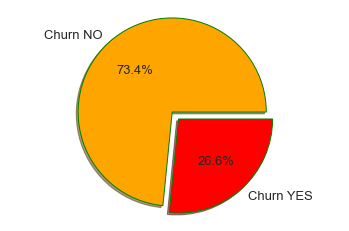

In [57]:
values  = df['churn'].value_counts().values.tolist()
#labels  = df['churn'].value_counts().keys().tolist()
labels = ['Churn NO','Churn YES']
wp = { 'linewidth' : 1, 'edgecolor' : "g" }
colors=['orange','r']
tp={'fontsize':13}

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',colors=colors,textprops=tp,shadow = True,wedgeprops=wp,explode=(.1,0))
ax1.axis('equal')
plt.show()

In [58]:
#Payment Method

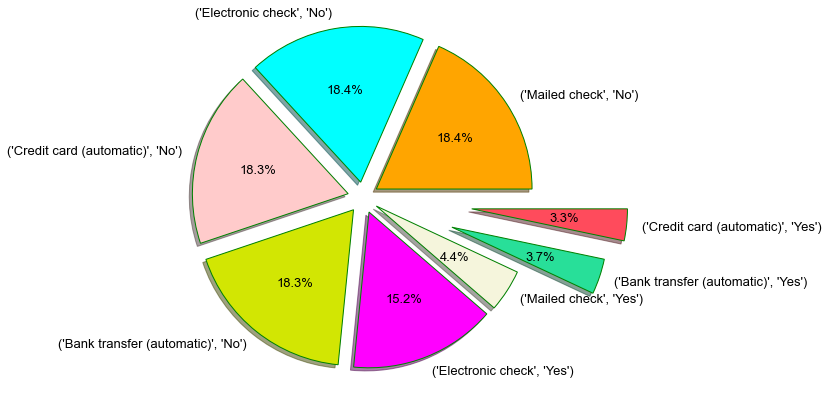

In [59]:
values  = df[['paymentMethod','churn']].value_counts().values.tolist()
labels  = df[['paymentMethod','churn']].value_counts().keys().tolist()

wp = { 'linewidth' : 1, 'edgecolor' : "g" }
colors=["orange", "cyan", "#ffcbcb", "#d2e603", "magenta", "beige",'#28df99','#ff4b5c']
tp={'fontsize':13,'color':'black'}
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.6,.7) 


fig1, ax1 = plt.subplots(figsize=(14,7))
ax1.pie(values, labels=labels, autopct='%1.1f%%',colors=colors,textprops=tp,shadow = True,wedgeprops=wp,explode=explode)
ax1.axis('equal')
plt.show()

In [60]:
#df[['paymentMethod','churn']].value_counts().values.tolist()

In [61]:
#df[['paymentMethod','churn']].value_counts().keys().tolist()

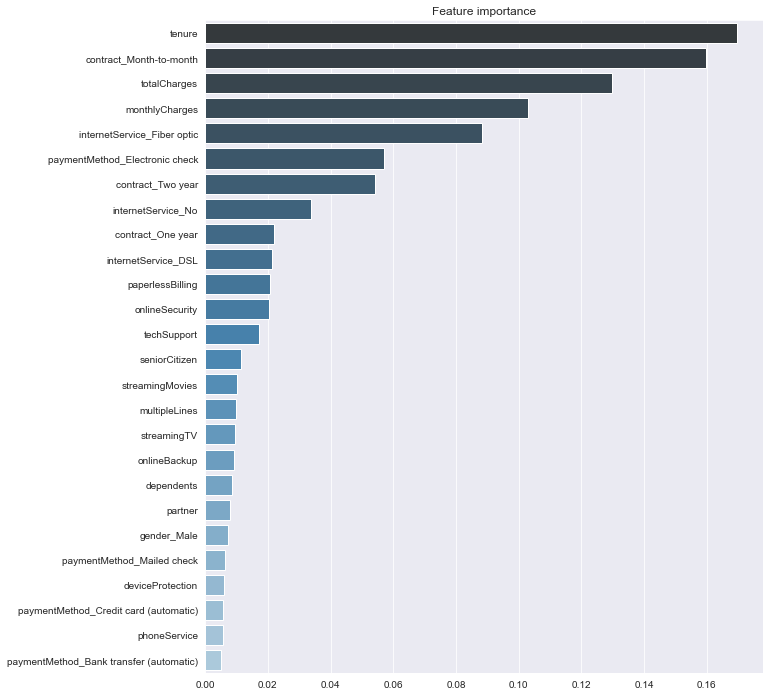

In [62]:
from sklearn.ensemble import RandomForestClassifier

params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)

# Drop redundant columns (for features with two unique values)
drop = ['churn_Yes', 'churn_No', 'gender_Female']
x, y = df.drop(drop,axis=1), df['churn_Yes']

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')